In [2]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
import umap
import math as m

# Visualizing the voltage traces obtained at various temperature using UMAP  
  
The code is similar to the one in UMAP_C51A.pynb, but written to generate plots for all different cells in one go.

Number of clusters: 3


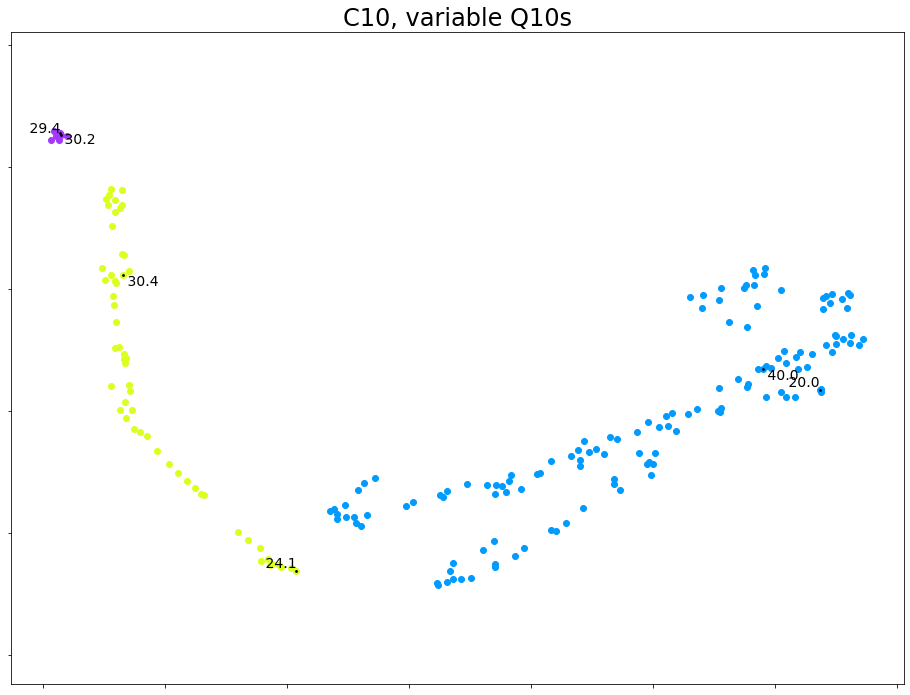

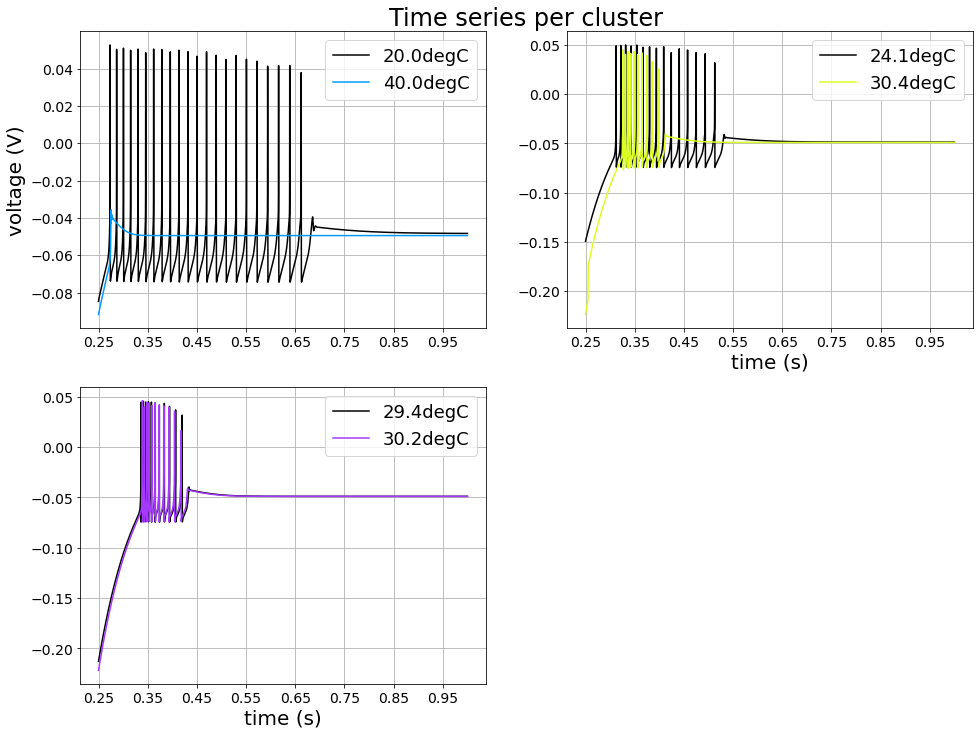

Number of clusters: 4


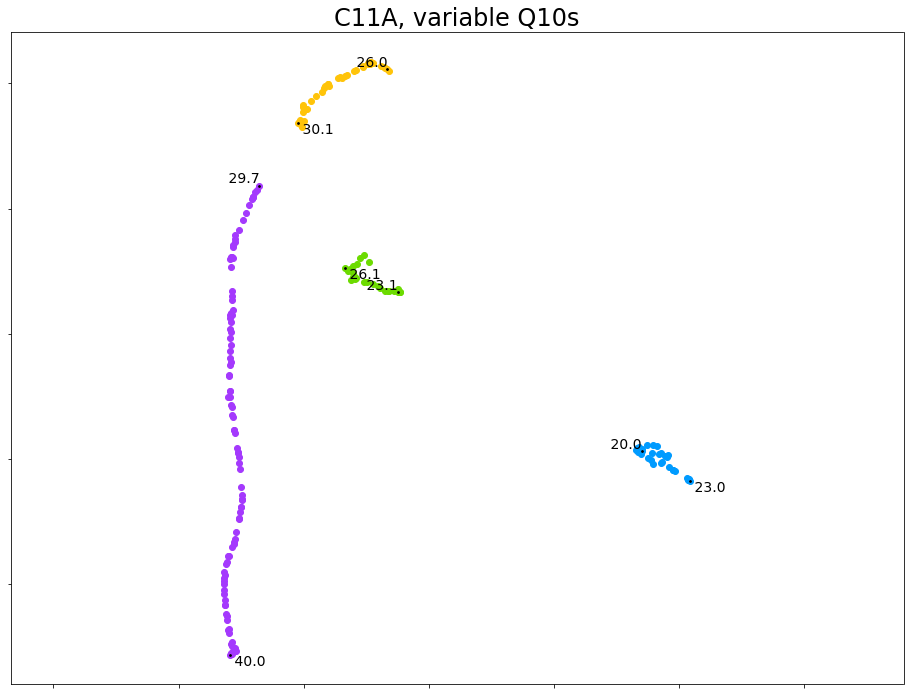

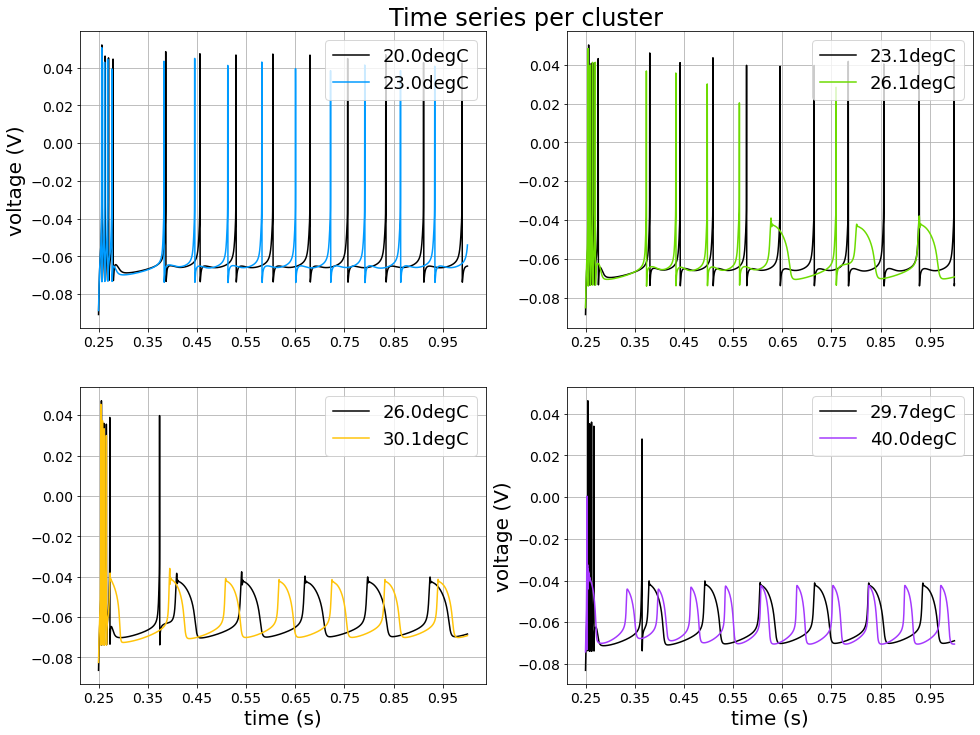

Number of clusters: 2


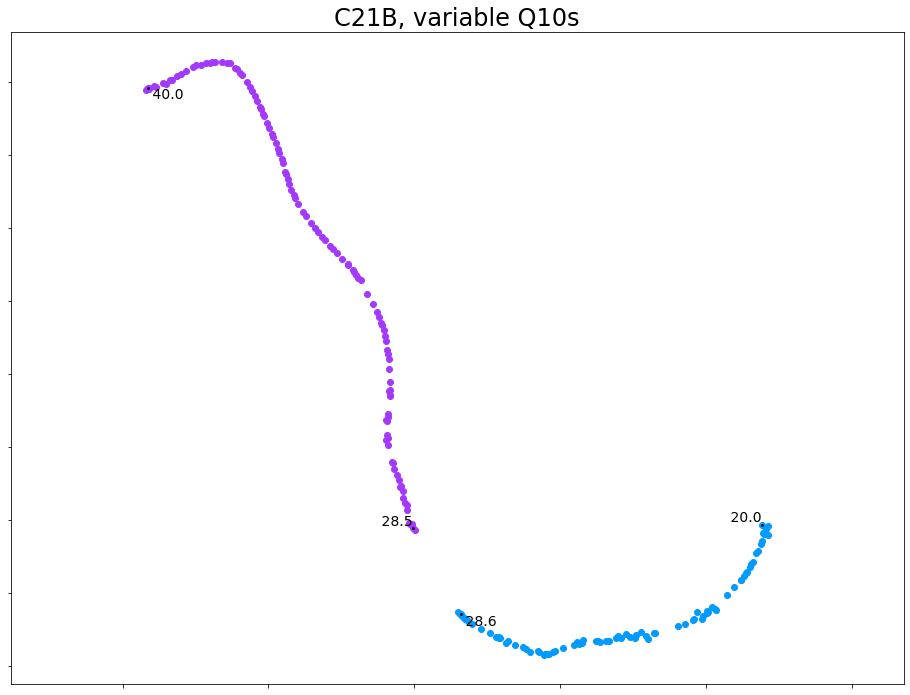

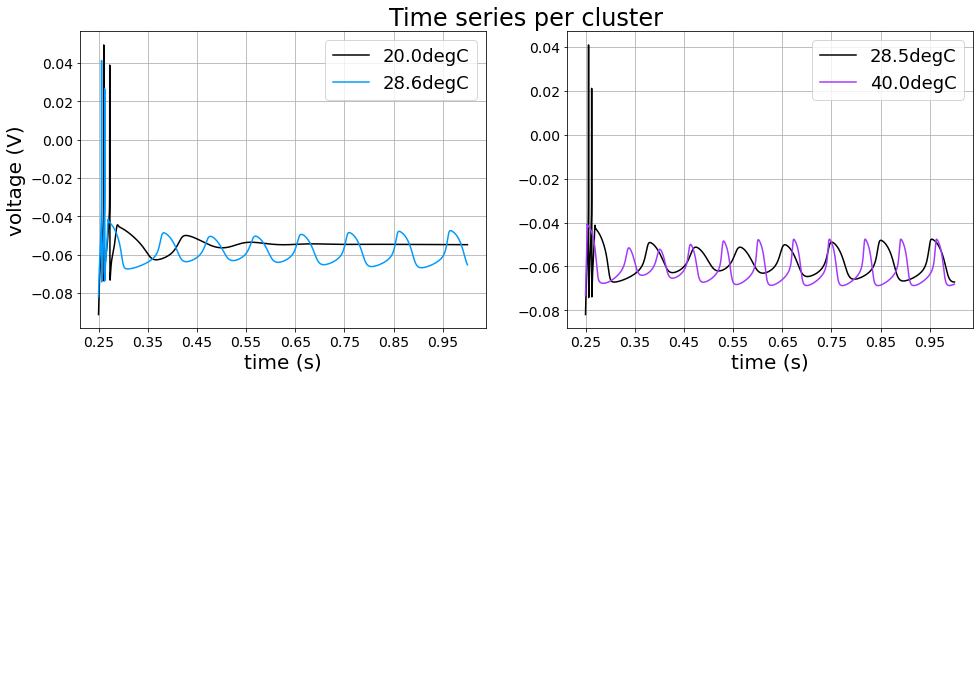

Number of clusters: 4


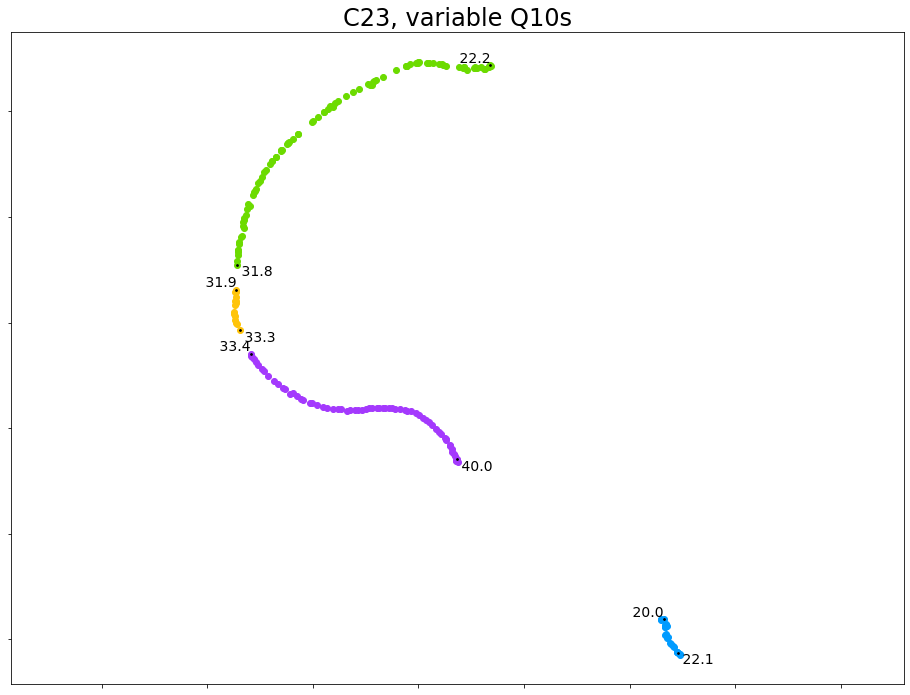

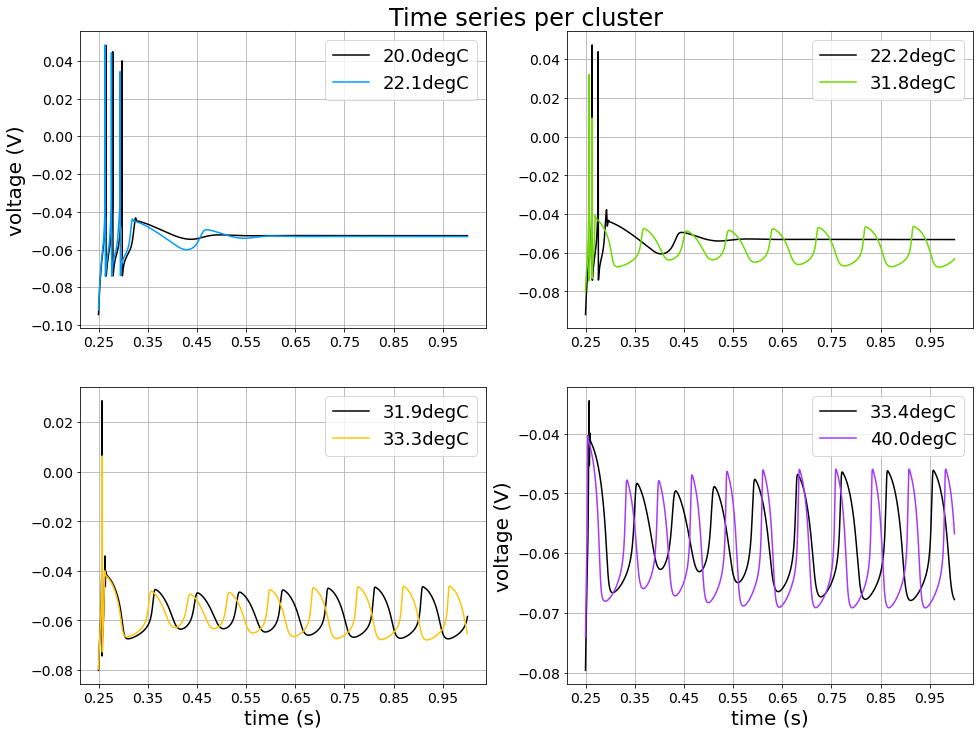

Number of clusters: 2


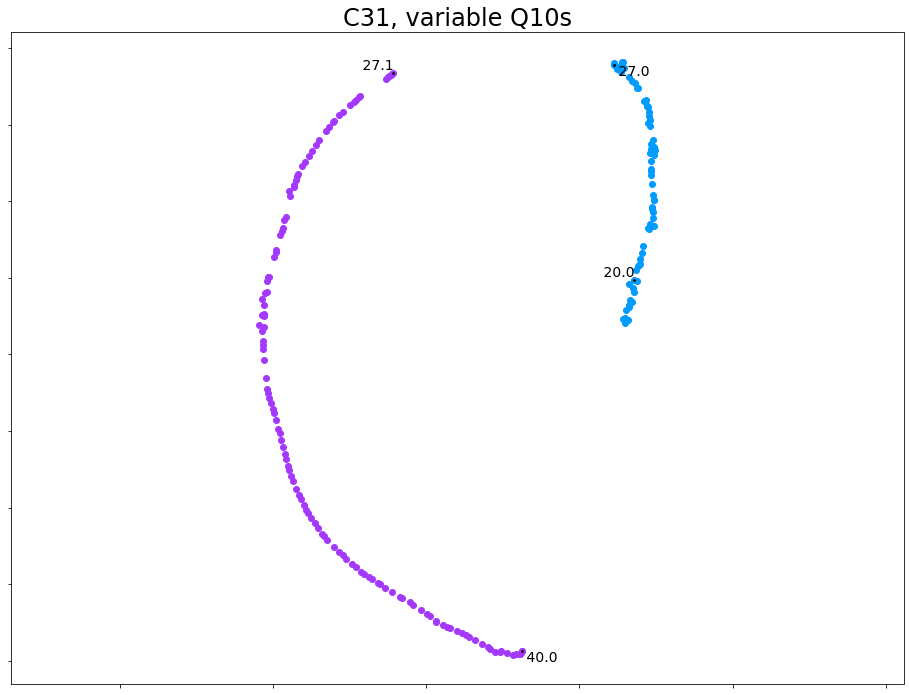

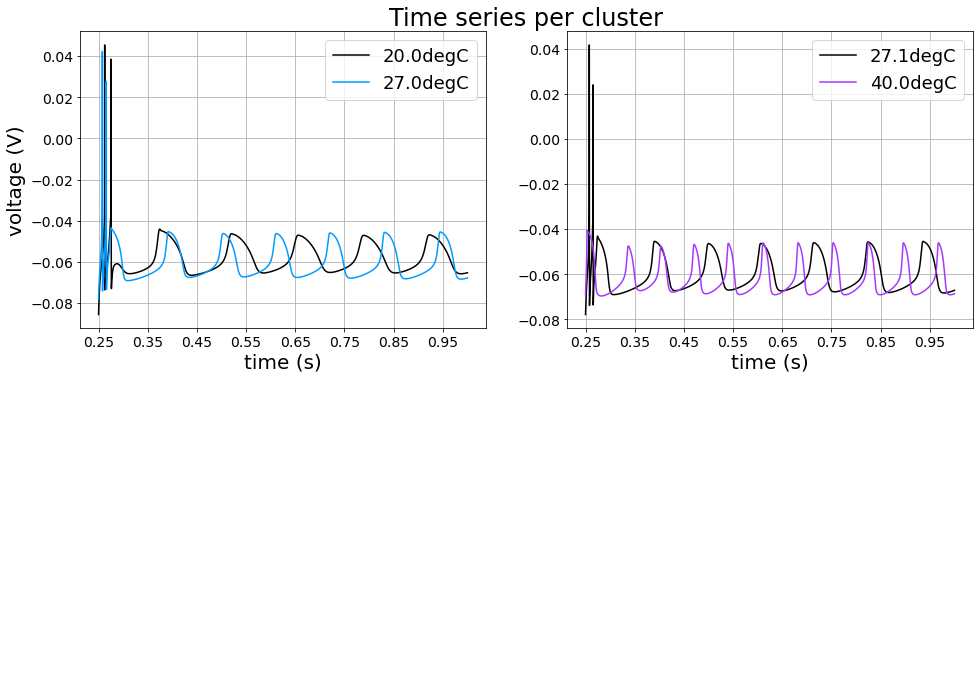

Number of clusters: 9


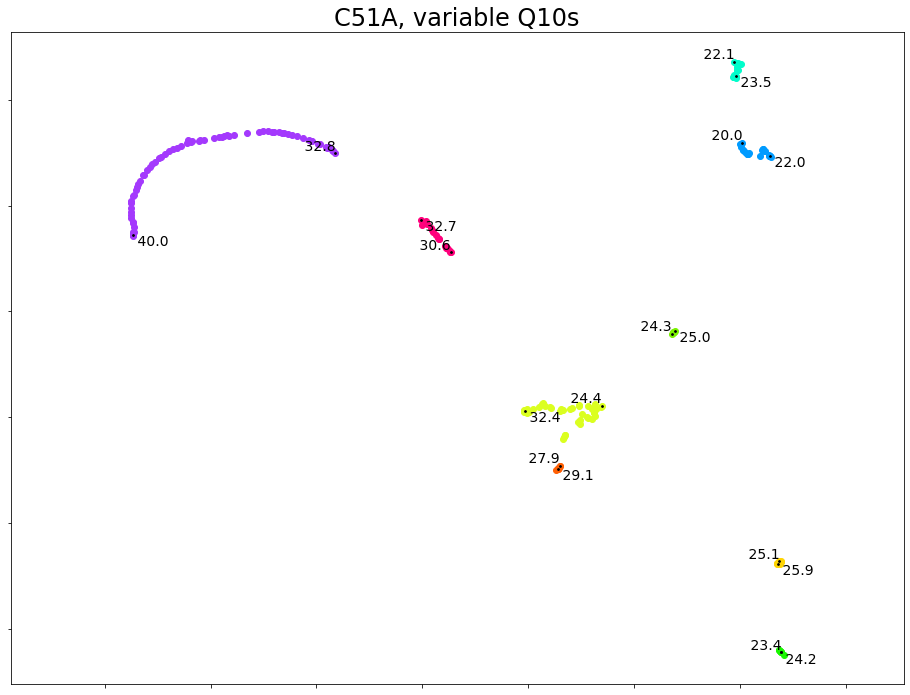

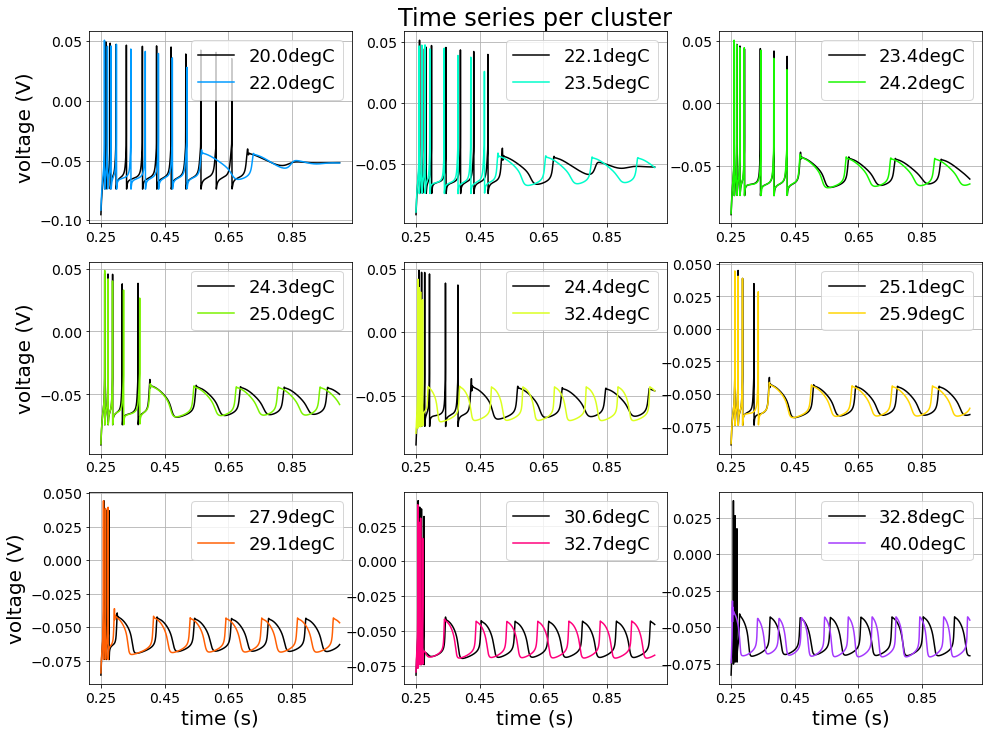

Number of clusters: 3


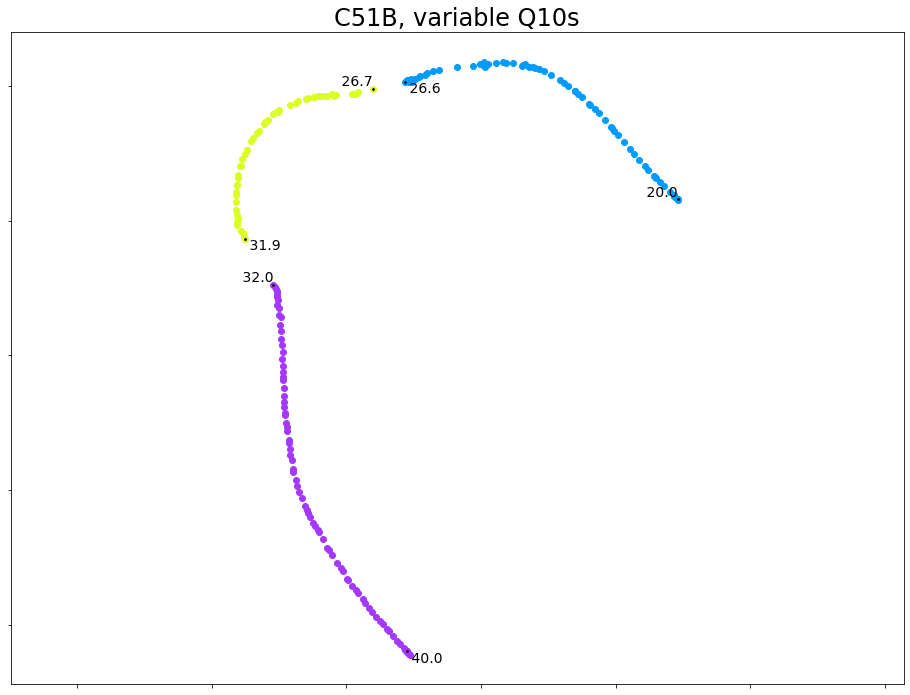

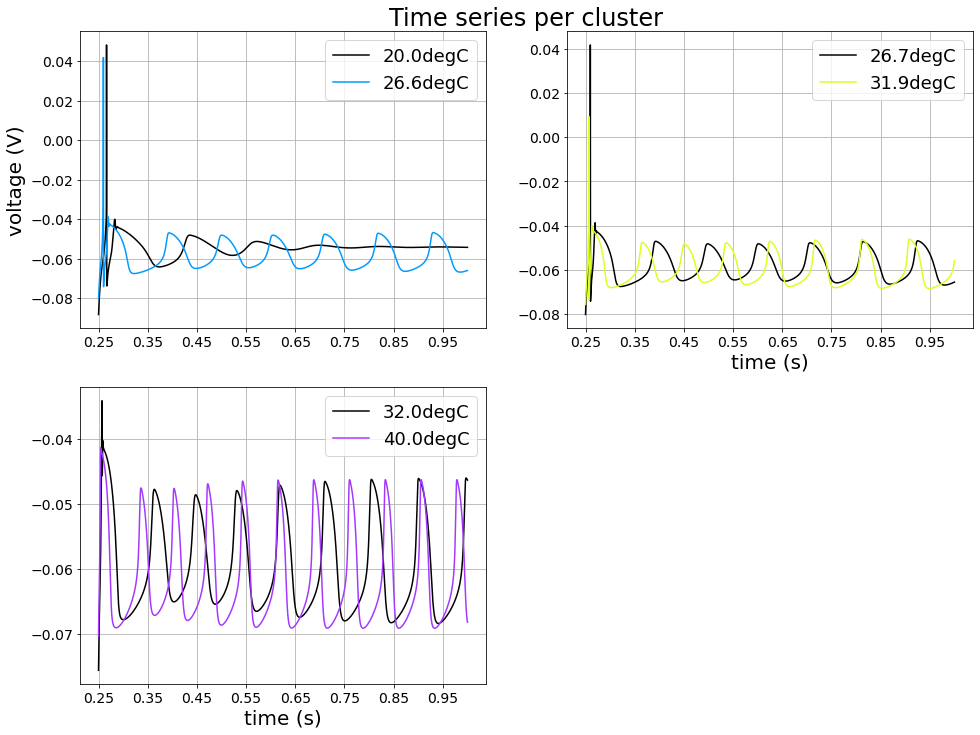

Number of clusters: 4


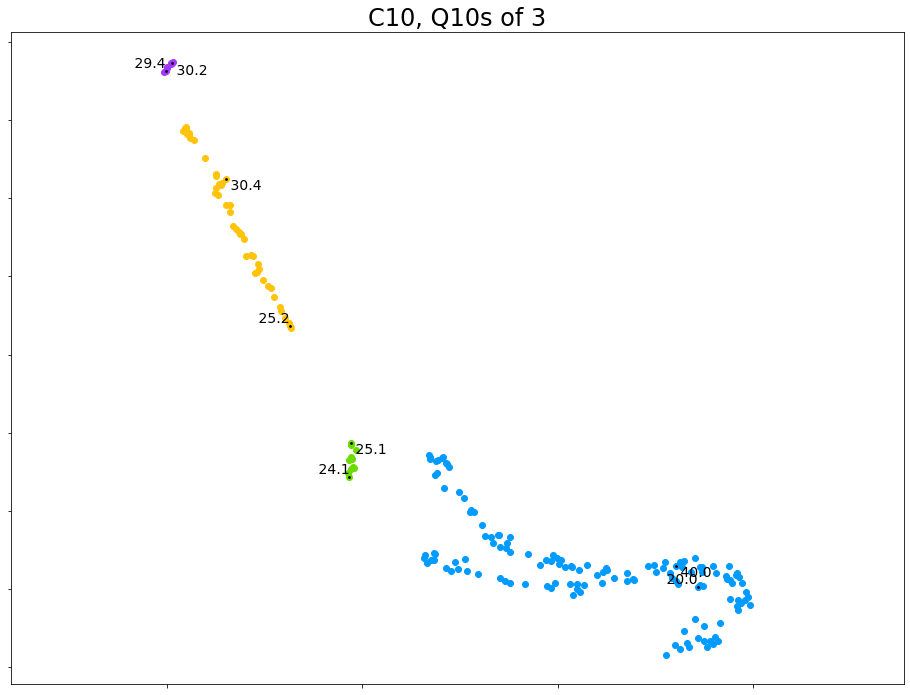

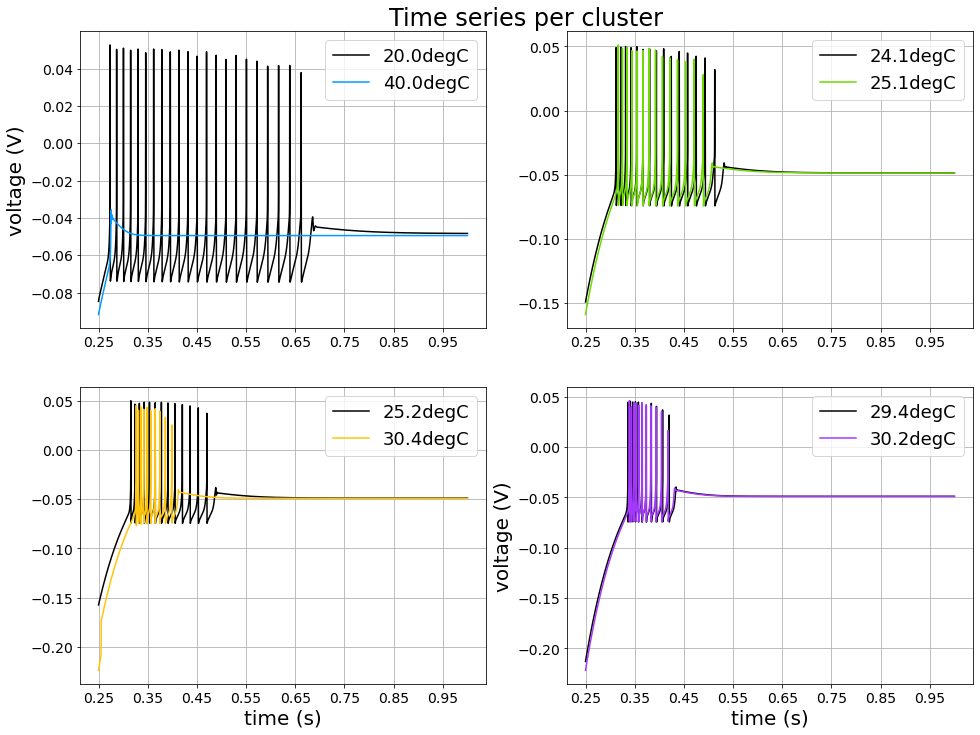

Number of clusters: 5


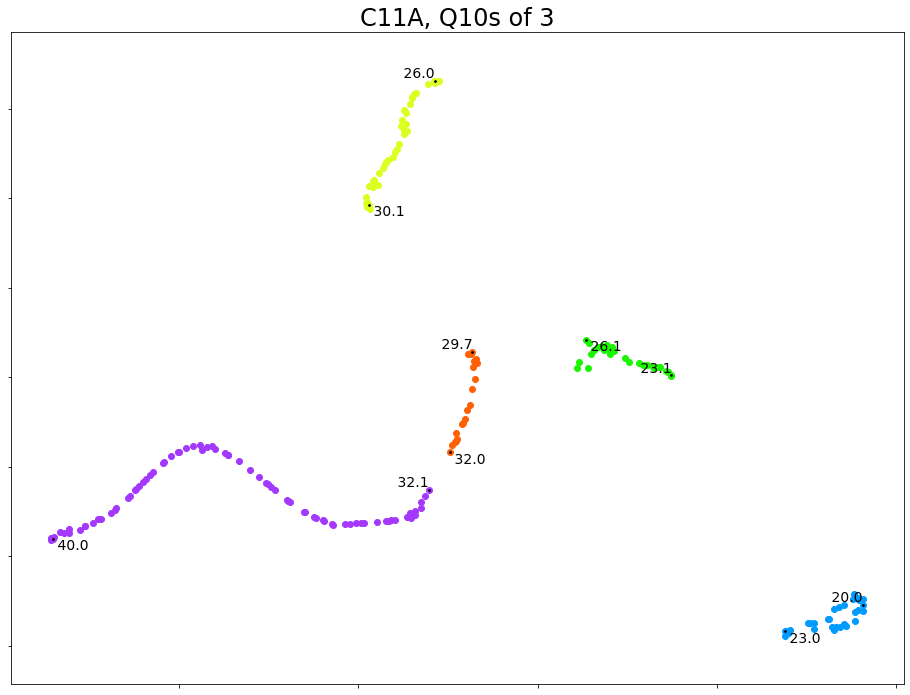

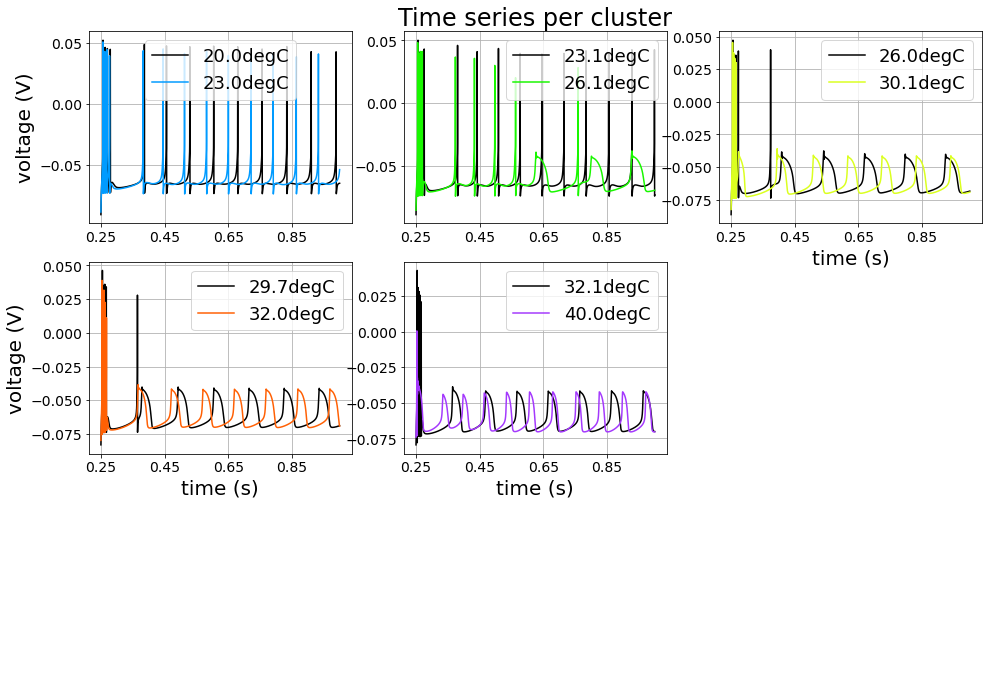

Number of clusters: 2


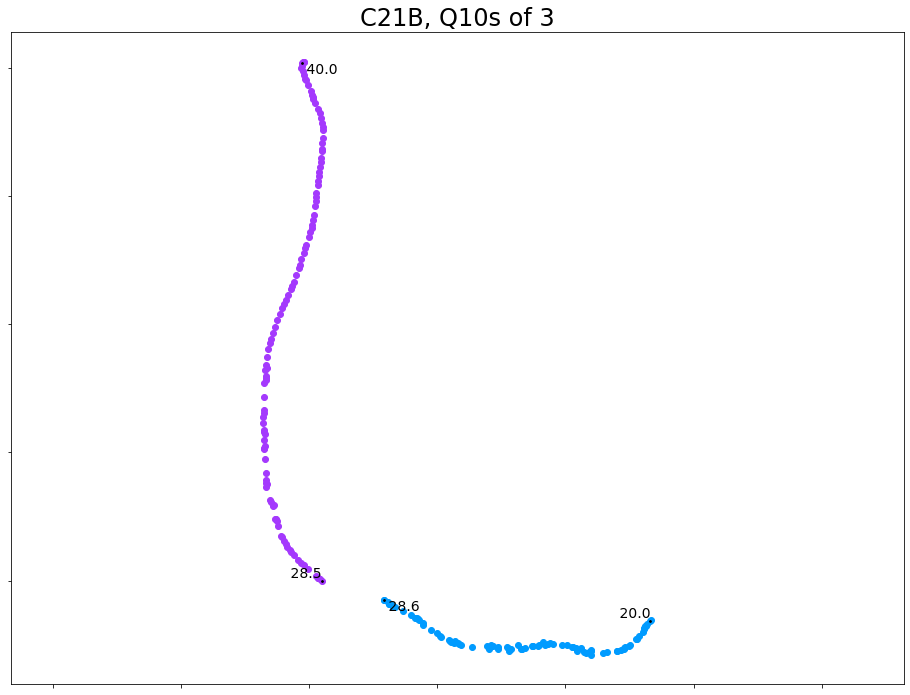

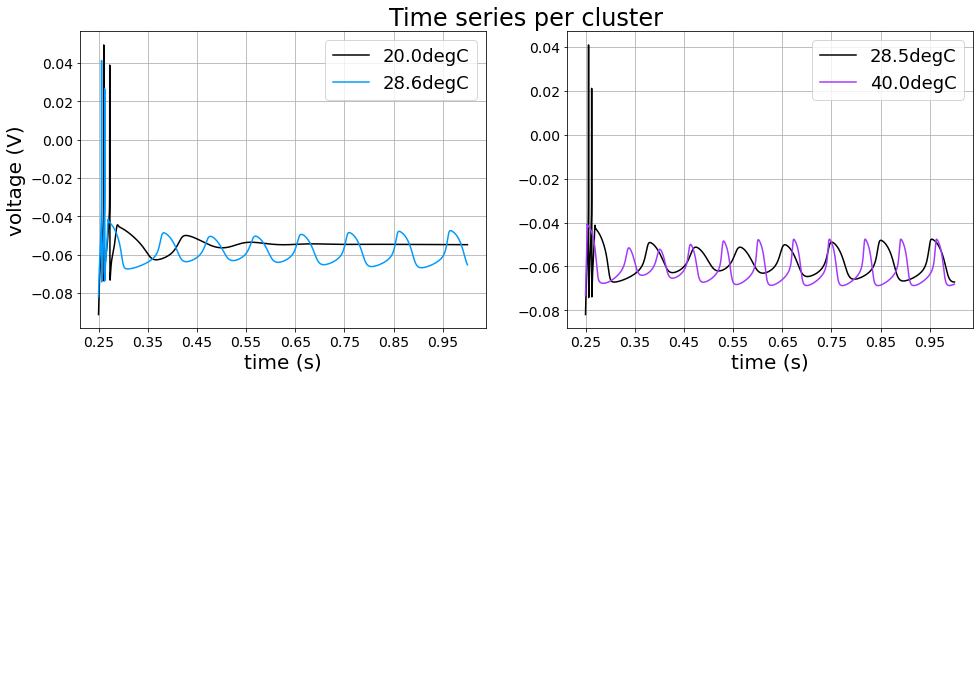

Number of clusters: 2


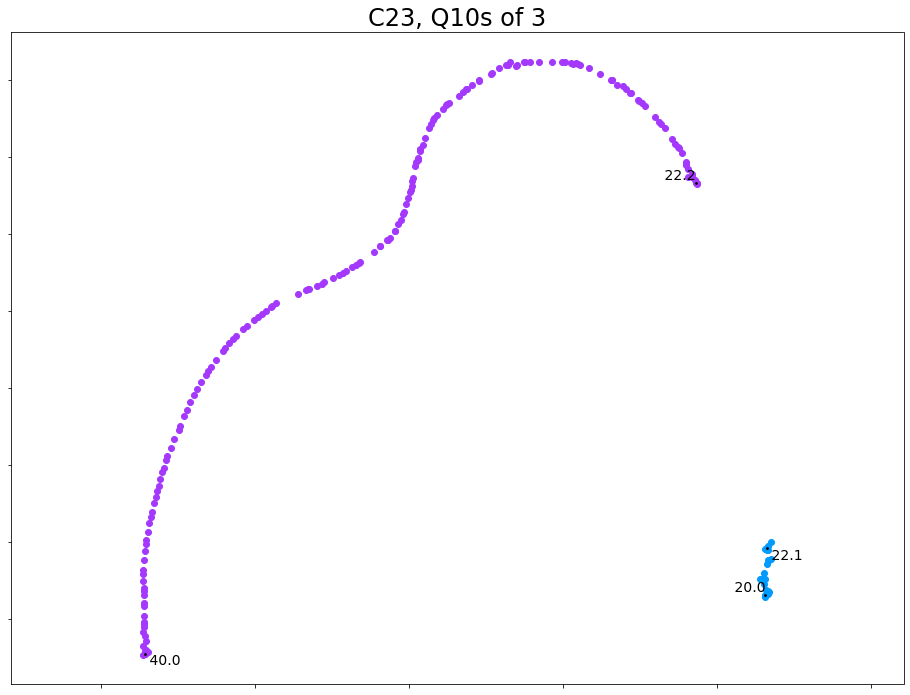

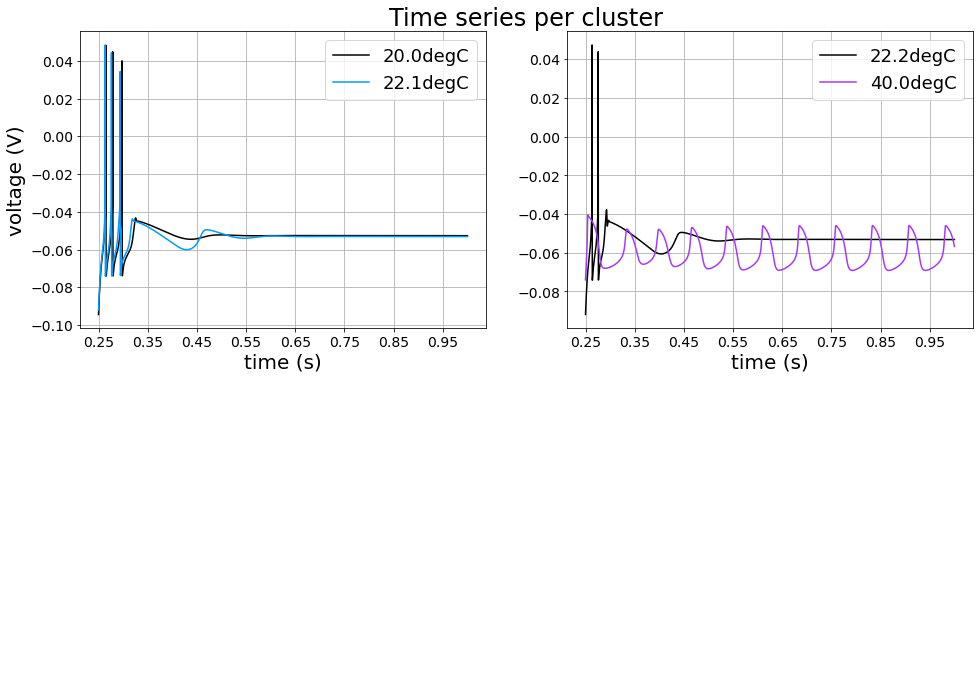

Number of clusters: 2


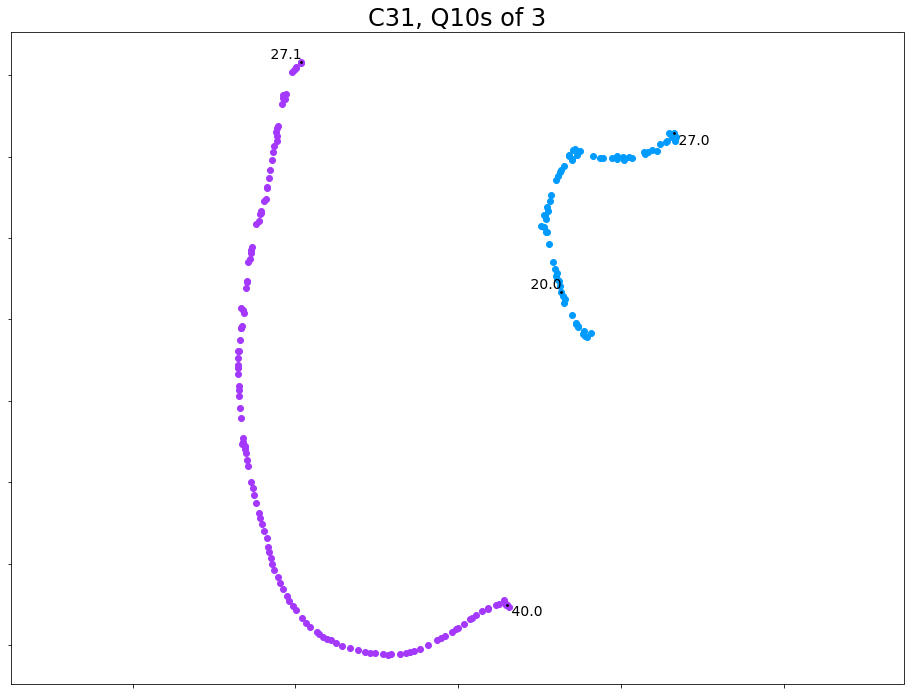

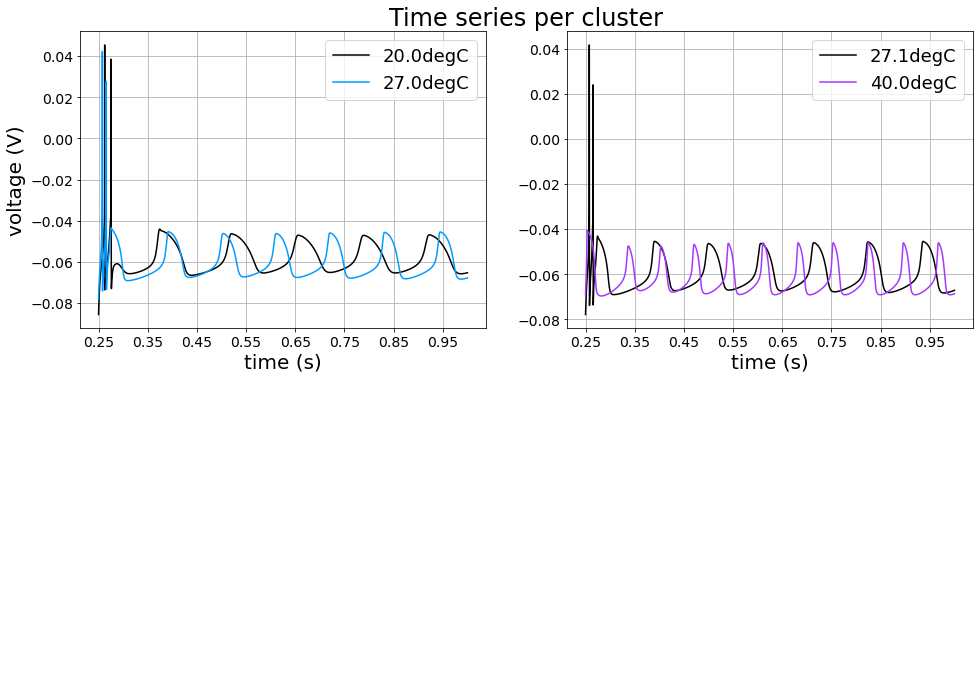

Number of clusters: 10


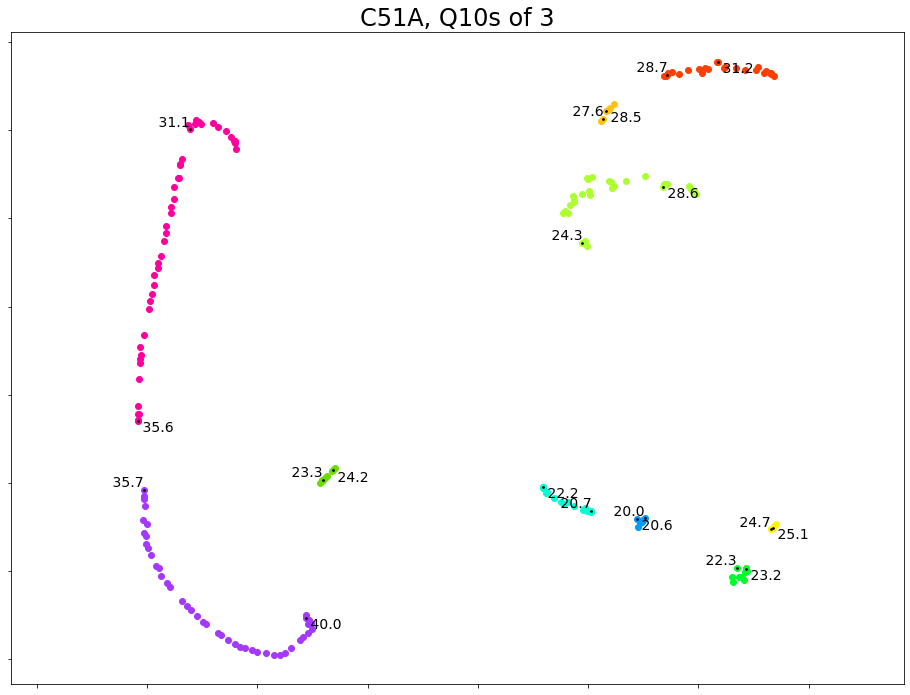

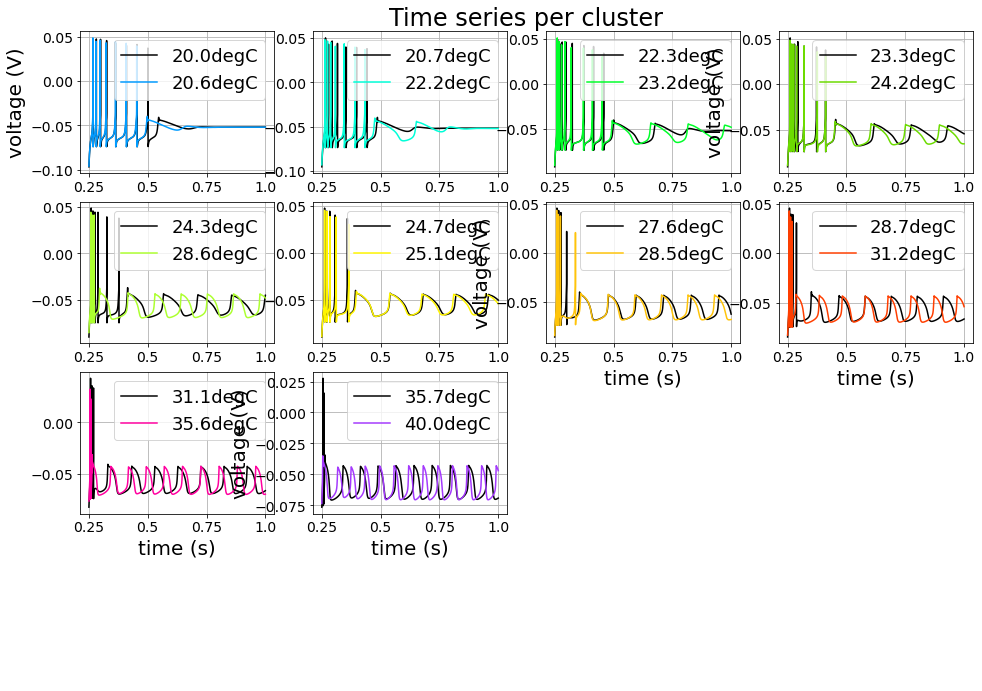

Number of clusters: 3


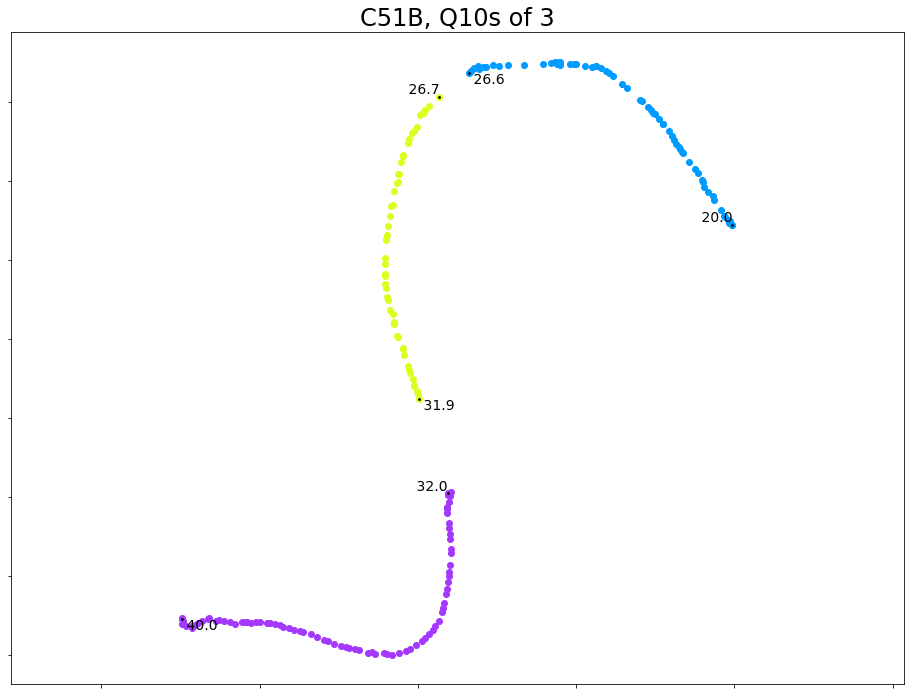

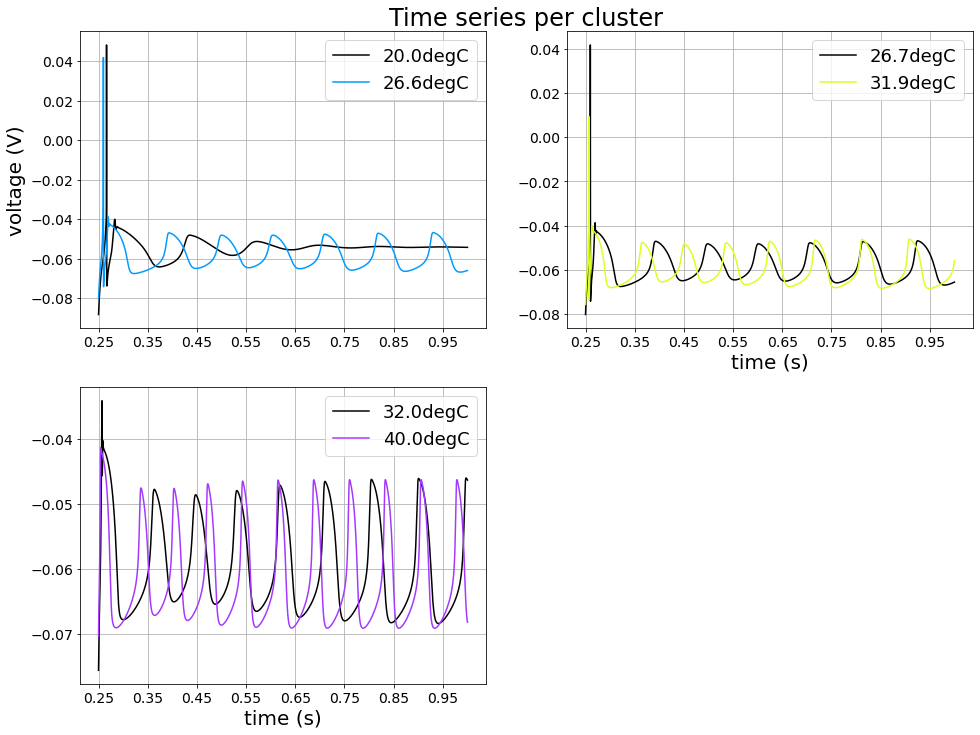

In [4]:
%matplotlib inline

cellSelection = ["3_C10", "3_C11A", "3_C21B", "3_C23", "3_C31", "3_C51A", "3_C51B"]
cellSelection = ["4_C10", "4_C11A", "4_C21B", "4_C23", "4_C31", "4_C51A", "4_C51B"]
cellSelection = ["3_C10", "3_C11A", "3_C21B", "3_C23", "3_C31", "3_C51A", "3_C51B",
                 "4_C10", "4_C11A", "4_C21B", "4_C23", "4_C31", "4_C51A", "4_C51B"]
#cellSelection = ["3_C23"]

for cellName in cellSelection:

    data_set = pd.read_csv("SimulationResults/"+cellName+".csv", index_col=0)
    
    data_set = data_set.drop(['0.2499'], axis=1)
    reducer = umap.UMAP(metric = 'euclidean', n_neighbors=10)
    embedding = reducer.fit_transform(data_set)
    clrmap = plt.cm.gist_ncar
    db = DBSCAN(eps=1, min_samples=5).fit(embedding)
    labels = db.labels_
    unique_labels = set(labels)
    colors = [clrmap(each) for each in np.linspace(0.15, 0.85, len(unique_labels))]
    print("Number of clusters: " + str(len(unique_labels)))

    plt.rcParams['figure.figsize'] = [16, 12]
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(len(labels)):
        col = colors[labels[i]]
        ax.scatter(embedding[i][0], embedding[i][1], color=tuple(col))
    
    first = []
    last = []

    for cluster_label in unique_labels:
        for i in range(len(labels)):
            if labels[i] == cluster_label:
                first.append(data_set.iloc[i].name)
                ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
                label = str(data_set.iloc[i].name)
                ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, horizontalalignment='right', verticalalignment='bottom')
                break
        for i in range(len(labels)-1, -1, -1):
            if labels[i] == cluster_label:
                last.append(data_set.iloc[i].name)
                ax.scatter(embedding[i][0], embedding[i][1], c="black", s=3)
                label = str(data_set.iloc[i].name)
                ax.annotate(" "+label[:4], xy=(embedding[i][0], embedding[i][1]), 
                        fontsize = 14, verticalalignment='top')
                break

    plt.gca().set_aspect('equal', 'datalim')
    if cellName[0] == "3":
        ax.set_title(cellName[2:]+", variable Q10s", fontsize=24)
    if cellName[0] == "4":
        ax.set_title(cellName[2:]+", Q10s of 3", fontsize=24)
    ax.set(xticklabels=[])
    ax.set(yticklabels=[])
    plt.show()
    
    n = m.ceil(m.sqrt(len(unique_labels)))
    plt.rcParams['figure.figsize'] = [16, 12]
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 14
    plt.rcParams['ytick.labelsize'] = 14

    data_setT = pd.DataFrame.transpose(data_set)
    colors_low = [clrmap(each-0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]
    colors_high = [clrmap(each+0.05) for each in np.linspace(0.05, 0.85, len(unique_labels))]

    fig = plt.figure()
    plt.title('Time series per cluster', fontsize=24)
    plt.box(on=None)
    plt.axis('off')

    for cluster_label in unique_labels:
        ax = fig.add_subplot(n, n, cluster_label+1)
        col = colors[cluster_label]
        col_low = colors_low[cluster_label]
        col_high = colors_high[cluster_label]
        #data_setT[[first[cluster_label], last[cluster_label]]].plot(color={tuple(col_low),tuple(col_high)})  
        data_setT[first[cluster_label]].plot(color='k') 
        data_setT[last[cluster_label]].plot(color=tuple(col)) 
        if cluster_label >= len(unique_labels)-n:
            plt.xlabel('time (s)', fontsize=20)
        if int((cluster_label + 1) % 3) == 1:
            plt.ylabel('voltage (V)', fontsize=20)
        ax.legend([first[cluster_label], last[cluster_label]], fontsize=18)
        ax.grid(True)
        #ax.set_xticks([0.25*5000, 0.5*5000, 0.75*5000, 1.0*5000])
        #ax.set_xticklabels(["0.25", "0.5", "0.75", "1.0"])
        #plt.title('Lowest and highest temperature samples belonging to cluster '+str(cluster_label), color=tuple(col))


    plt.show()